#### 1.1. Importing Libraries

In [13]:
# Install and import necessary libraries
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install openpyxl
%pip install pyarrow

import pandas as pd
import numpy as np

# Load pyplot as plt 
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


#### 1.2.  Loading the data
Your data comes from the [London Datastore](https://data.london.gov.uk/): a free, open-source data-sharing portal for London-oriented datasets. 

In [14]:
# First, make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [15]:
# Take a look at some of the properties of the dataset 
properties.shape
properties.head()
properties.tail()
properties.describe

<bound method NDFrame.describe of     Unnamed: 0 City of London Barking & Dagenham       Barnet       Bexley  \
0          NaT      E09000001          E09000002    E09000003    E09000004   
1   1995-01-01    91448.98487         50460.2266  93284.51832  64958.09036   
2   1995-02-01    82202.77314        51085.77983  93190.16963  64787.92069   
3   1995-03-01    79120.70256        51268.96956  92247.52435  64367.49344   
4   1995-04-01    77101.20804        53133.50526  90762.87492  64277.66881   
..         ...            ...                ...          ...          ...   
343 2023-07-01         973133             341446       575129       387566   
344 2023-08-01         901625             341710       585896       386939   
345 2023-09-01         875029             339983       586665       388778   
346 2023-10-01         831708             341370       579777       385477   
347 2023-11-01         727023             353585       581265       381785   

           Brent      Bromley

**2.2. Cleaning the data**

You might find you need to transpose your dataframe, check out what its row indexes are, and reset the index. You  also might find you need to assign the values of the first row to your column headings  . (Hint: recall the .columns feature of DataFrames, as well as the iloc[] method).

Don't be afraid to use StackOverflow for help  with this.

In [16]:
# Transpose dataframe
properties_T = properties.T
properties_T = properties_T.reset_index()
properties_T.columns = properties_T.iloc[0]
properties_T = properties_T.drop(0)

**2.3. Cleaning the data (part 2)**

You might we have to **rename** a couple columns. How do you do this? The clue's pretty bold...

In [17]:
properties_T = properties_T.rename(columns = {'Unnamed: 0':'London_Borough', pd.NaT: 'ID'})

**2.4.Transforming the data**

Remember what Wes McKinney said about tidy data? 

You might need to **melt** your DataFrame here. 

In [18]:
# Melt dataframe to make data more manageable 
clean_properties = pd.melt(properties_T, id_vars= ['London_Borough', 'ID'])
clean_properties = clean_properties.rename(columns = {0: 'Month', 'value': 'Average_price'})

Remember to make sure your column data types are all correct. Average prices, for example, should be floating point numbers... 

In [19]:
clean_properties['Average_price'] = pd.to_numeric(clean_properties['Average_price'])

**2.5. Cleaning the data (part 3)**

Do we have an equal number of observations in the ID, Average Price, Month, and London Borough columns? Remember that there are only 32 London Boroughs. How many entries do you have in that column? 

Check out the contents of the London Borough column, and if you find null values, get rid of them however you see fit. 

In [20]:
# Remove null data points
clean_properties.count()
clean_properties['London_Borough'].unique()

clean_properties[clean_properties['ID'].isna()]

NaNFreeDF2 = clean_properties.dropna()

In [21]:
NaNFreeDF2.count()

NaNFreeDF2['London_Borough'].unique()

nonBoroughs = ['Inner London', 'Outer London', 
               'NORTH EAST', 'NORTH WEST', 'YORKS & THE HUMBER', 
               'EAST MIDLANDS', 'WEST MIDLANDS',
              'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST', 
              'SOUTH WEST', 'England']

NaNFreeDF2[NaNFreeDF2.London_Borough.isin(nonBoroughs)]
NaNFreeDF2 = NaNFreeDF2[~NaNFreeDF2.London_Borough.isin(nonBoroughs)]
df = NaNFreeDF2
df.head(10)

,London_Borough,ID,Month,Average_price
0,City of London,E09000001,1995-01-01 00:00:00,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01 00:00:00,50460.22660
2,Barnet,E09000003,1995-01-01 00:00:00,93284.51832
3,Bexley,E09000004,1995-01-01 00:00:00,64958.09036
4,Brent,E09000005,1995-01-01 00:00:00,71306.56698
5,Bromley,E09000006,1995-01-01 00:00:00,81671.47692
6,Camden,E09000007,1995-01-01 00:00:00,120932.88810
7,Croydon,E09000008,1995-01-01 00:00:00,69158.16225
8,Ealing,E09000009,1995-01-01 00:00:00,79885.89069
9,Enfield,E09000010,1995-01-01 00:00:00,72514.69096


**2.6. Visualizing the data**

To visualize the data, why not subset on a particular London Borough? Maybe do a line plot of Month against Average Price?

C:\Users\enapi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:7587: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


Text(0, 0.5, 'Price')

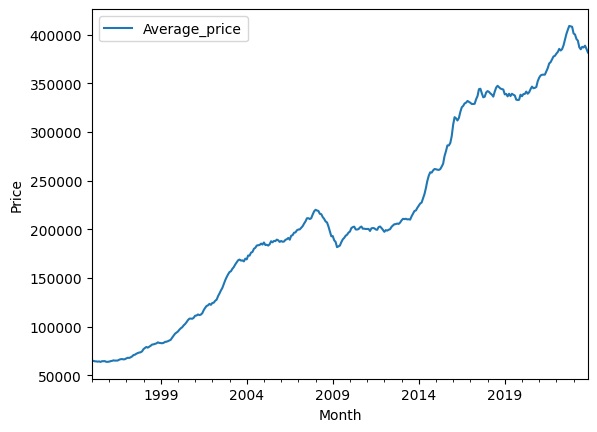

In [22]:
bexley_prices = df[df['London_Borough'] == 'Bexley']
ax = bexley_prices.plot(kind = 'line', x = 'Month', y = 'Average_price')
ax.set_ylabel('Price')

To limit the number of data points you have, you might want to extract the year from every month value your *Month* column. 

To this end, you *could* apply a ***lambda function***. Your logic could work as follows:
1. look through the `Month` column
2. extract the year from each individual value in that column 
3. store that corresponding year as separate column. 

Whether you go ahead with this is up to you. Just so long as you answer our initial brief: which boroughs of London have seen the greatest house price increase, on average, over the past two decades? 

In [23]:
df['Year'] = df['Month'].apply(lambda t: t.year)

dfg = df.groupby(by=['London_Borough', 'Year']).mean('Year')
dfg.sample(10)

dfg = dfg.reset_index()

**3. Modeling**

Consider creating a function that will calculate a ratio of house prices, comparing the price of a house in 2018 to the price in 1998.

Consider calling this function create_price_ratio.

You'd want this function to:
1. Take a filter of dfg, specifically where this filter constrains the London_Borough, as an argument. For example, one admissible argument should be: dfg[dfg['London_Borough']=='Camden'].
2. Get the Average Price for that Borough, for the years 1998 and 2018.
4. Calculate the ratio of the Average Price for 1998 divided by the Average Price for 2018.
5. Return that ratio.

Once you've written this function, you ultimately want to use it to iterate through all the unique London_Boroughs and work out the ratio capturing the difference of house prices between 1998 and 2018.

Bear in mind: you don't have to write a function like this if you don't want to. If you can solve the brief otherwise, then great! 

***Hint***: This section should test the skills you acquired in:
- Python Data Science Toolbox - Part One, all modules

In [24]:
def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998].iloc[0])
    y2018 = float(d['Average_price'][d['Year']==2018].iloc[0])
    ratio = [y2018/y1998]
    return ratio

create_price_ratio(dfg[dfg['London_Borough']=='Bexley'])
final = {}

{'Barking & Dagenham': [4.89661861291754], 'Barnet': [4.358195917538044], 'Bexley': [4.248977046127877], 'Brent': [4.8945544971392865], 'Bromley': [4.094784685333876], 'Camden': [4.935353408884261], 'City of London': [5.30162037758761], 'Croydon': [4.201100280024766], 'Ealing': [4.311450902121834], 'Enfield': [4.263471583495811], 'Greenwich': [4.7630363473291935], 'Hackney': [6.198285561008663], 'Hammersmith & Fulham': [4.13779810193623], 'Haringey': [5.134624964136042], 'Harrow': [4.0591964329643195], 'Havering': [4.325230371335307], 'Hillingdon': [4.2002730803844575], 'Hounslow': [3.976409106143329], 'Islington': [4.844048012802297], 'Kensington & Chelsea': [5.082465066092464], 'Kingston upon Thames': [4.270549521484271], 'Lambeth': [4.957751163514062], 'Lewisham': [5.449221041059686], 'Merton': [4.741273313294603], 'Newham': [5.305390437201879], 'Redbridge': [4.471182006097364], 'Richmond upon Thames': [4.005161895721457], 'Southwark': [5.516485302379378], 'Sutton': [4.1185226085731

[Text(0, 0, 'Hackney'),
 Text(1, 0, 'Waltham Forest'),
 Text(2, 0, 'Southwark'),
 Text(3, 0, 'Lewisham'),
 Text(4, 0, 'Westminster'),
 Text(5, 0, 'Newham'),
 Text(6, 0, 'City of London'),
 Text(7, 0, 'Haringey'),
 Text(8, 0, 'Kensington & Chelsea'),
 Text(9, 0, 'Lambeth'),
 Text(10, 0, 'Camden'),
 Text(11, 0, 'Barking & Dagenham'),
 Text(12, 0, 'Brent'),
 Text(13, 0, 'Islington'),
 Text(14, 0, 'Greenwich'),
 Text(15, 0, 'Wandsworth'),
 Text(16, 0, 'Merton'),
 Text(17, 0, 'Tower Hamlets'),
 Text(18, 0, 'Redbridge'),
 Text(19, 0, 'Barnet'),
 Text(20, 0, 'Havering'),
 Text(21, 0, 'Ealing'),
 Text(22, 0, 'Kingston upon Thames'),
 Text(23, 0, 'Enfield'),
 Text(24, 0, 'Bexley'),
 Text(25, 0, 'Croydon'),
 Text(26, 0, 'Hillingdon'),
 Text(27, 0, 'Hammersmith & Fulham'),
 Text(28, 0, 'Sutton'),
 Text(29, 0, 'Bromley'),
 Text(30, 0, 'Harrow'),
 Text(31, 0, 'Richmond upon Thames')]

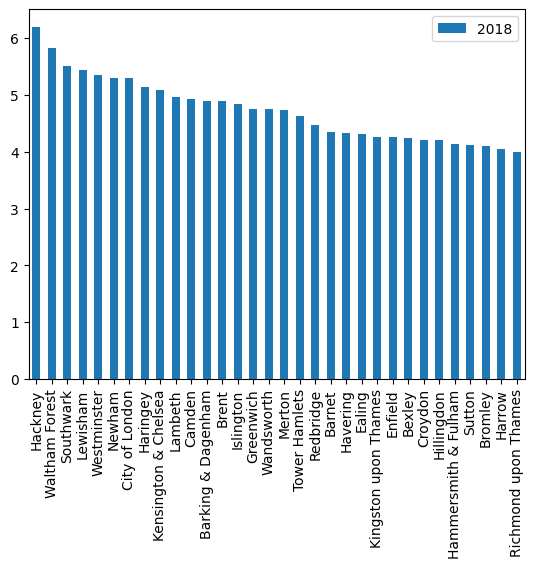

In [25]:
for b in dfg['London_Borough'].unique(): 
    borough = dfg[dfg['London_Borough'] == b]
    final[b] = create_price_ratio(borough)
print(final)

df_ratios = pd.DataFrame(final)

df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)

descending_ratio = df_ratios.sort_values(by='2018',ascending=False).head(32)
ax = descending_ratio[['Borough','2018']].plot(kind='bar')

ax.set_xticklabels(descending_ratio.Borough)

### 4. Conclusion
What can you conclude? Type out your conclusion below. 

Look back at your notebook. Think about how you might summarize what you have done, and prepare a quick presentation on it to your mentor at your next meeting. 

We hope you enjoyed this practical project. It should have consolidated your data hygiene and pandas skills by looking at a real-world problem involving just the kind of dataset you might encounter as a budding data scientist. Congratulations, and looking forward to seeing you at the next step in the course! 